<a href="https://colab.research.google.com/github/vfunnny2000/NN/blob/main/HW_8/Blood_cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##BCCD: Подсчет и обнаружение клеток крови

Вывод: тут все как-то очень не очень. Мозг взорвался.
Поэтому представляю две работы: эту и по болезни Паркинсона.

Вариант 1

In [19]:
import pandas as pd
import numpy as np
import os

In [17]:
import zipfile
zip_path = '/content/BCCD_Dataset-1.0.zip'

In [18]:
extract_path = '/content/BCCD'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [22]:
contents = os.listdir(extract_path)

In [23]:
for item in contents:
    print(item)

BCCD_Dataset-1.0


In [24]:
bccd_dataset_path = '/content/BCCD/BCCD_Dataset-1.0'

contents_bccd_dataset = os.listdir(bccd_dataset_path)

In [25]:
for item in contents_bccd_dataset:
    print(item)

scripts
dataset
BCCD
example.jpg
LICENSE
.gitignore
README.md


In [32]:
# Загрузка и предобработка изображений
data_dir = '/content/BCCD'  # Путь к базе данных
batch_size = 32

In [33]:
!pip install tensorflow
!pip install keras
!pip install matplotlib

In [49]:
import keras
from keras import layers, models, losses

In [50]:
train_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=batch_size)

Found 365 files belonging to 1 classes.
Using 292 files for training.


In [52]:
val_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=batch_size)

class_names = train_ds.class_names

Found 365 files belonging to 1 classes.
Using 73 files for validation.


In [53]:
# Создание модели нейронной сети
model = models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

In [96]:
from keras.losses import CategoricalCrossentropy

In [99]:
# Компиляция модели
model.compile(
  optimizer='SGD',
  loss=CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [100]:
# Обучение модели
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
10/10 [==============================] - 18s 2s/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 15s 2s/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 15s 2s/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 17s 2s/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 15s 1s/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 15s 1s/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 17s 2s/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 15s 2s/ste

1/1 [==============================] - 1s 604ms/step


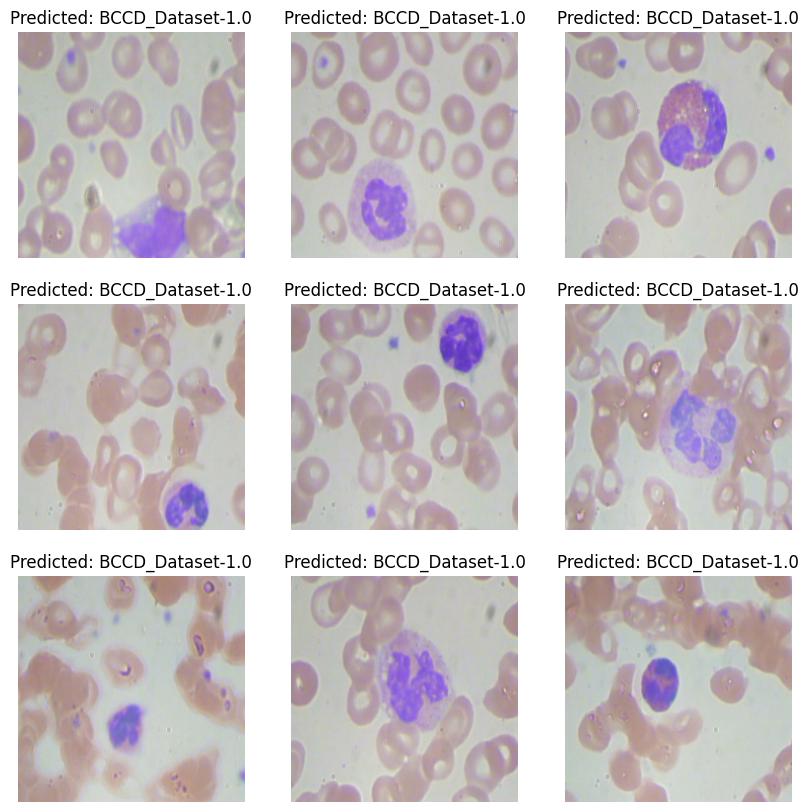

In [102]:
# Визуализация результатов
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  predictions = model.predict(images)
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f'Predicted: {class_names[tf.argmax(predictions[i]).numpy()]}')
    plt.axis("off")
plt.show()

Вариант 2

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

In [60]:
# Предварительная обработка изображений
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [61]:
# Загрузка набора данных
dataset = ImageFolder(root='/content/BCCD', transform=transform)
train_set, test_set = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), int(len(dataset)*0.2)])

In [62]:
# Создание загрузчиков данных
train_loader = DataLoader(train_set, batch_size=4, shuffle=True, num_workers=2)
test_loader = DataLoader(test_set, batch_size=4, shuffle=False, num_workers=2)

In [67]:
import torch.nn.functional as F

In [68]:
# Определение архитектуры нейронной сети
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 53 * 53, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)  # Здесь указываем количество классов

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [69]:
# Инициализация нейронной сети
net = Net()

In [70]:
# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [71]:
# Обучение нейронной сети
for epoch in range(5):  # Здесь можно указать количество эпох
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # Печать статистики каждые 2000 мини-пакетов
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Обучение завершено')


Обучение завершено


In [93]:
# Сохранение модели
torch.save(net.state_dict(), 'model.pth')

In [92]:
classes = ["RBC", "WBC", "Platelets"]
ratio = 0.9
path = '../../BCCD'



In [90]:
# Визуализация изображений из тестового набора данных
data_iter = iter(train_loader)
images, labels = next(data_iter)

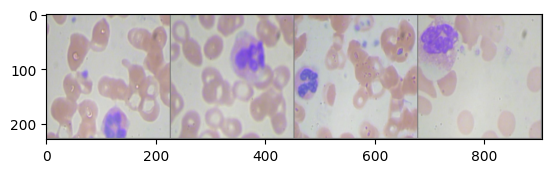

GroundTruth:    RBC   RBC   RBC   RBC


In [85]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Вывод изображений
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [91]:
# Загрузка сохраненной модели
net = Net()
net.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [88]:
# Получение предсказаний для тестового набора данных
outputs = net(images)

In [89]:
# Вывод предсказаний
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % [predicted[j]]
                              for j in range(4)))

Predicted:  [tensor(0)] [tensor(0)] [tensor(0)] [tensor(0)]
